## Energy saved from recycling
<p>Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.</p>
<p>Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.</p>
<p>The government would like to motivate citizens by sharing the total energy that the combined recycling efforts have saved every year. They have asked you to help them.</p>

In [1]:
import pandas as pd

# 1. Exploratory Data Analysis

In [2]:
# datasets/wastestats.csv - Recycling statistics per waste type for the period 2003 to 2017
df1 = pd.read_csv('datasets/wastestats.csv')

df1.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [3]:
df1.describe() # df1 has the years from 2003 to 2017

,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000
mean,3.697191e+05,4.896987e+05,8.594173e+05,0.481778,2010.000000
std,6.842470e+05,9.607678e+05,1.579112e+06,0.365106,4.330127
min,1.300000e+03,0.000000e+00,1.440000e+04,0.000000,2003.000000
25%,2.460000e+04,1.830000e+04,1.184000e+05,0.110000,2006.000000
50%,1.062000e+05,9.110000e+04,3.324000e+05,0.490000,2010.000000
75%,5.000000e+05,5.200000e+05,8.098000e+05,0.850000,2014.000000
max,3.045200e+06,4.825900e+06,7.851500e+06,0.990000,2017.000000


In [4]:
df1.shape # df1 has 6 columns

(225, 6)

In [5]:
# datasets/2018_2019_waste.csv - Recycling statistics per waste type for the period 2018 to 2019
df2 = pd.read_csv('datasets/2018_2019_waste.csv')

df2.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1440,1434,2019
1,Ferrous Metal,1278,1270,2019
2,Paper/Cardboard,1011,449,2019
3,Plastics,930,37,2019
4,Food,7440,136,2019


In [6]:
df2.describe() # df2 only has years from 2018 and 2019

,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
count,30.000000,30.000000,30.000000
mean,1218.433333,560.400000,2018.500000
std,2165.170833,1149.760683,0.508548
min,32.000000,6.000000,2018.000000
25%,173.500000,26.000000,2018.000000
50%,360.000000,126.500000,2018.500000
75%,1043.250000,394.250000,2019.000000
max,7695.000000,4726.000000,2019.000000


In [7]:
df2.shape # df2 only has 4 columns

(30, 4)

In [8]:
# datasets/energy_saved.csv - Estimations of the amount of energy saved per waste type in kWh
df3 = pd.read_csv('datasets/energy_saved.csv', header=3, index_col=0)

df3.head()

,Plastic,Glass,Ferrous Metal,Non-Ferrous Metal,Paper
material,,,,,
energy_saved,5774 Kwh,42 Kwh,642 Kwh,14000 Kwh,4000 kWh
crude_oil saved,16 barrels,NaN,1.8 barrels,40 barrels,1.7 barrels


## 1.1 cleaning dataframes

### 1.1.1 cleaning df1

In [40]:
# reading file
df1 = pd.read_csv('datasets/wastestats.csv')

# filtering only the relevant years (2015-2017) for df1
df1 = df1[df1['year'] >= 2015]

# keeping columns of interest
cols = ['waste_type','total_waste_recycled_tonne','year']
df1 = df1.loc[:,cols]

# renaming columns for consistency with df1
df1.rename(columns={
    "waste_type":"waste",
    "total_waste_recycled_tonne":"recycled_tonnes"
}, inplace=True)

df1.head()

,waste,recycled_tonnes,year
0,Food,111100.0,2016
1,Paper/Cardboard,607100.0,2016
2,Plastics,59500.0,2016
3,C&D,1585700.0,2016
4,Horticultural waste,209000.0,2016


### 1.1.2 cleaning df2

In [47]:
# reading file
df2 = pd.read_csv('datasets/2018_2019_waste.csv')

# renaming columns for consistency with df1
df2.rename(columns={
    "Waste Type":"waste",
    "Total Recycled ('000 tonnes)":"recycled_tonnes",
    "Year":"year"
}, inplace=True)

# # keeping only columns of interest
cols = ['waste','recycled_tonnes','year']
df2 = df2.loc[:,cols]

# # converting units from 'thousands of tonnes' to 'tonnes'
df2['recycled_tonnes'] *= 1000

df2.head()

,waste,recycled_tonnes,year
0,Construction& Demolition,1434000,2019
1,Ferrous Metal,1270000,2019
2,Paper/Cardboard,449000,2019
3,Plastics,37000,2019
4,Food,136000,2019


### 1.1.3 merging df1 and df2

In [52]:
# concatanating dataframes
df = pd.concat([df1, df2], ignore_index=True)

df.head()

,waste,recycled_tonnes,year
0,Food,111100.0,2016
1,Paper/Cardboard,607100.0,2016
2,Plastics,59500.0,2016
3,C&D,1585700.0,2016
4,Horticultural waste,209000.0,2016


In [53]:
# NEXT VERSION: study regex to try do this more elegantly
# filtering materials of interest (glass, plastic, ferrous, and non-ferrous metals)...
# 1. first we standardize (lower-case and replace whitespace for hyphen)
df['waste'] = df['waste'].str.lower()
df['waste'].replace(to_replace=[' ','-'], value='_', inplace=True, regex=True)

# 2. then we identify all the unique materials
materials_all = list(df['waste'].unique())
materials_all.sort()
materials_all

['ash_&_sludge',
 'ash_and_sludge',
 'c&d',
 'construction&_demolition',
 'construction_debris',
 'ferrous_metal',
 'food',
 'glass',
 'horticultural',
 'horticultural_waste',
 'non_ferrous_metal',
 'non_ferrous_metals',
 'others_(stones,_ceramic,_rubber,_ect)',
 'others_(stones,_ceramic,_rubber,_etc.)',
 'others_(stones,_ceramics_&_rubber_etc)',
 'others_(stones,_ceramics_&_rubber_etc.)',
 'overall',
 'paper/cardboard',
 'plastic',
 'plastics',
 'scrap_tyres',
 'textile/leather',
 'total',
 'used_slag',
 'wood']

In [54]:
# we take only those materials in which we're interested at
materials_interest = ['ferrous_metal','glass','non_ferrous_metal','non_ferrous_metals','plastic','plastics']
df = df[df['waste'].isin(materials_interest)]

# we do a further standardization
# df['waste_type'] = df['waste_type'].map({"non_ferrous_metals":"non_ferrous_metal","plastics":"plastic"})
df.loc[df['waste'] == 'non_ferrous_metals', 'waste'] = 'non_ferrous_metal'
df.loc[df['waste'] == 'plastics', 'waste'] = 'plastic'

df.sort_values(['year','waste'], ignore_index=True, inplace=True)
df

,waste,recycled_tonnes,year
0,ferrous_metal,1333300.0,2015
1,glass,14600.0,2015
2,non_ferrous_metal,160400.0,2015
3,plastic,57800.0,2015
4,ferrous_metal,1351500.0,2016
5,glass,14700.0,2016
6,non_ferrous_metal,95900.0,2016
7,plastic,59500.0,2016
8,ferrous_metal,1371000.0,2017
9,glass,12400.0,2017


### 1.1.4 cleaning df3

In [62]:
# reading file
df3 = pd.read_csv('datasets/energy_saved.csv', header=3, index_col=0)

# transposing dataframe to create a sort of "catalog" and do a future join
df3 = df3.transpose()

# splitting column to get only integers
df3 = df3['energy_saved'].str.split(expand=True)

# dropping remaining column that only contains "Kwh"
df3.drop(columns=1, inplace=True)

df3.reset_index(inplace=True)

# renaming columns
df3.rename(columns={"index":"waste",0:"kWh_saved_per_recycled_tonne"}, inplace=True)

# # changing column type to numeric for further calculations
df3["kWh_saved_per_recycled_tonne"] = pd.to_numeric(df3["kWh_saved_per_recycled_tonne"])

# # standardization of strings (lower-case and replace whitespace for hyphen)
df3['waste'] = df3['waste'].str.lower()
df3['waste'].replace(to_replace=[' ','-'], value='_', inplace=True, regex=True)

df3

,waste,kWh_saved_per_recycled_tonne
0,plastic,5774
1,glass,42
2,ferrous_metal,642
3,non_ferrous_metal,14000
4,paper,4000


## 1.2 data visualization

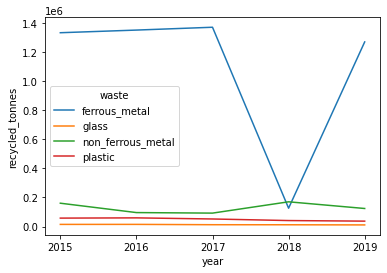

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.lineplot(
    x='year',
    y='recycled_tonnes',
    hue='waste',
    data=df
)

years = list(df['year'].unique())

ax = plt.xticks(years)

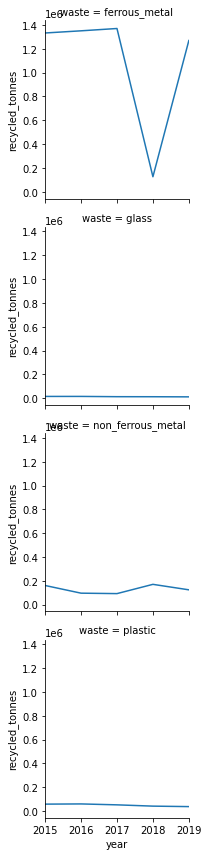

In [65]:
g = sns.FacetGrid(df, row='waste', xlim=(2015,2019))

g.map(sns.lineplot, 'year', 'recycled_tonnes')

It seems that for the year 2018, there was an incorrect entry on the recycled amount of ferrous metals. Other than that, the data looks quite good.

## 1.3 inputing values

In [66]:
df[df['waste'] == 'ferrous_metal'] # it seems that there was an incorrect entry on year 2018. Let's multiply that by 10

,waste,recycled_tonnes,year
0,ferrous_metal,1333300.0,2015
4,ferrous_metal,1351500.0,2016
8,ferrous_metal,1371000.0,2017
12,ferrous_metal,126000.0,2018
16,ferrous_metal,1270000.0,2019


In [67]:
df.loc[
    (df['waste'] == 'ferrous_metal') & (df['year'] == 2018),
    'recycled_tonnes'
] *= 10

df[df['waste'] == 'ferrous_metal']

,waste,recycled_tonnes,year
0,ferrous_metal,1333300.0,2015
4,ferrous_metal,1351500.0,2016
8,ferrous_metal,1371000.0,2017
12,ferrous_metal,1260000.0,2018
16,ferrous_metal,1270000.0,2019


# 2. calculating yearly energy savings

In [74]:
energy_savings = df.merge(df3)

energy_savings['total_energy_saved'] = energy_savings['recycled_tonnes'] * energy_savings['kWh_saved_per_recycled_tonne']

energy_savings

,waste,recycled_tonnes,year,kWh_saved_per_recycled_tonne,total_energy_saved
0,ferrous_metal,1333300.0,2015,642,8.559786e+08
1,ferrous_metal,1351500.0,2016,642,8.676630e+08
2,ferrous_metal,1371000.0,2017,642,8.801820e+08
3,ferrous_metal,1260000.0,2018,642,8.089200e+08
4,ferrous_metal,1270000.0,2019,642,8.153400e+08
5,glass,14600.0,2015,42,6.132000e+05
6,glass,14700.0,2016,42,6.174000e+05
7,glass,12400.0,2017,42,5.208000e+05
8,glass,12000.0,2018,42,5.040000e+05
9,glass,11000.0,2019,42,4.620000e+05


In [75]:
annual_energy_savings = energy_savings.groupby('year').agg({"total_energy_saved":"sum"})

annual_energy_savings

,total_energy_saved
year,
2015,3.435929e+09
2016,2.554433e+09
2017,2.470596e+09
2018,3.426158e+09
2019,2.765440e+09
